In [3]:
import warnings
warnings.filterwarnings("ignore")

import anndata as ad
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
lustre_path='/lustre/scratch127/cellgen/cellgeni/tickets/' + os.getcwd().split('/')[4]
lustre_path

'/lustre/scratch127/cellgen/cellgeni/tickets/tic-3942'

# Reference 

In [17]:
# /nfs/team292/lg18/paediatric_gonads/data/all_rawcounts.h5ad
reference = sc.read(lustre_path+'/data/all_rawcounts.h5ad')
# Subset to our internal dataset
reference = reference[reference.obs['Dataset'].isin(['Sanger_adult', 'Sanger_pediatric'])]
reference = reference[~reference.obs['BatchscVI'].isin(['Sanger_2017'])]
#reference = reference[reference.obs['Sampling_site'].isin(['Cortex'])]
reference

View of AnnData object with n_obs × n_vars = 479480 × 27203
    obs: 'n_genes', 'Sample', 'library', 'Donor', 'Dataset', 'Developmental_stage', 'Sampling_site', 'Sampling_site_II', 'Age', 'Ancestry', 'Donor_procedure', 'Gender_affirming_surgery', 'Sex', 'Disease', 'Donor_procedure_II', 'Sampling_site_detail', 'Batch', 'Discarded', 'Sorted', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'percent_mito', 'n_counts', 'batch', 'genotype', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'BatchscVI', 'perdataset_lineage'
    var: 'gene_ids-0-Fan', 'feature_types-0-Fan', 'n_cells-0-Fan', 'gene_ids-1-Fan', 'feature_types-1-Fan', 'n_cells-1-Fan', 'gene_ids-10-Fan', 'feature_typ

In [18]:
reference.obs.Sampling_site.value_counts()

Sampling_site
Cortex      430528
Follicle     33606
Whole        11797
Medulla       3549
Name: count, dtype: int64

In [19]:
reference.X.data

array([1., 1., 1., ..., 1., 1., 1.], shape=(1027935721,), dtype=float32)

In [20]:
reference.obs

,n_genes,Sample,library,Donor,Dataset,Developmental_stage,Sampling_site,Sampling_site_II,Age,Ancestry,...,bh_pval,bonf_pval,is_doublet,sample,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,BatchscVI,perdataset_lineage
HCA_P_GON_CZI12935964_AAACCTGAGACTGGGT-Sanger_pediatric,758,HCA_P_GON_CZI12935964,HCA_P_GON_CZI12935964,AUrv5,Sanger_pediatric,paediatric,Cortex,Cortex_outer,5.0,NFE,...,0.722485,1.0,False,NaN,NaN,NaN,NaN,NaN,Sanger_2022,Endothelial
HCA_P_GON_CZI12935964_AAACCTGAGGGTGTGT-Sanger_pediatric,949,HCA_P_GON_CZI12935964,HCA_P_GON_CZI12935964,AUrv5,Sanger_pediatric,paediatric,Cortex,Cortex_outer,5.0,NFE,...,0.722485,1.0,False,NaN,NaN,NaN,NaN,NaN,Sanger_2022,Stromal
HCA_P_GON_CZI12935964_AAACCTGCAAGTTGTC-Sanger_pediatric,1845,HCA_P_GON_CZI12935964,HCA_P_GON_CZI12935964,AUrv5,Sanger_pediatric,paediatric,Cortex,Cortex_outer,5.0,NFE,...,0.722485,1.0,False,NaN,NaN,NaN,NaN,NaN,Sanger_2022,PV
HCA_P_GON_CZI12935964_AAACCTGCAGACACTT-Sanger_pediatric,5036,HCA_P_GON_CZI12935964,HCA_P_GON_CZI12935964,AUrv5,Sanger_pediatric,paediatric,Cortex,Cortex_outer,5.0,NFE,...,0.722485,1.0,False,NaN,NaN,NaN,NaN,NaN,Sanger_2022,PV
HCA_P_GON_CZI12935964_AAACCTGCATGCGCAC-Sanger_pediatric,847,HCA_P_GON_CZI12935964,HCA_P_GON_CZI12935964,AUrv5,Sanger_pediatric,paediatric,Cortex,Cortex_outer,5.0,NFE,...,0.744841,1.0,False,NaN,NaN,NaN,NaN,NaN,Sanger_2022,Endothelial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861STDY8624438_TTGTAGGCAGATGGGT-Sanger_adult,2624,4861STDY8624438,4861STDY8624438,M10,Sanger_adult,Adult,Medulla,Medulla,19.0,NaN,...,0.864197,1.0,False,4861STDY8624438,2624.0,7630.0,88.0,1.153342,Sanger_2019,Stromal
4861STDY8624438_TTTGCGCCACGGACAA-Sanger_adult,1585,4861STDY8624438,4861STDY8624438,M10,Sanger_adult,Adult,Medulla,Medulla,19.0,NaN,...,0.864197,1.0,False,4861STDY8624438,1585.0,4098.0,185.0,4.514397,Sanger_2019,PV
4861STDY8624438_TTTGCGCTCGCCAGCA-Sanger_adult,2246,4861STDY8624438,4861STDY8624438,M10,Sanger_adult,Adult,Medulla,Medulla,19.0,NaN,...,0.864197,1.0,False,4861STDY8624438,2246.0,6619.0,140.0,2.115123,Sanger_2019,PV
4861STDY8624438_TTTGGTTAGCCGTCGT-Sanger_adult,560,4861STDY8624438,4861STDY8624438,M10,Sanger_adult,Adult,Medulla,Medulla,19.0,NaN,...,0.812499,1.0,False,4861STDY8624438,560.0,747.0,37.0,4.953146,Sanger_2019,Endothelial


In [21]:
reference.var

,gene_ids-0-Fan,feature_types-0-Fan,n_cells-0-Fan,gene_ids-1-Fan,feature_types-1-Fan,n_cells-1-Fan,gene_ids-10-Fan,feature_types-10-Fan,n_cells-10-Fan,gene_ids-11-Fan,...,n_cells-2-Wagner,gene_ids-3-Wagner,feature_types-3-Wagner,n_cells-3-Wagner,n_cells-Wagner,n_cells_by_counts-Wagner,mean_counts-Wagner,pct_dropout_by_counts-Wagner,total_counts-Wagner,n_cells
A1BG,ENSG00000121410,Gene Expression,66.0,ENSG00000121410,Gene Expression,71.0,ENSG00000121410,Gene Expression,25.0,ENSG00000121410,...,954.0,ENSG00000121410,Gene Expression,366.0,2278.0,2314.0,0.080941,93.395742,2836.0,34368
A1BG-AS1,ENSG00000268895,Gene Expression,5.0,ENSG00000268895,Gene Expression,3.0,nan,nan,NaN,ENSG00000268895,...,133.0,ENSG00000268895,Gene Expression,19.0,272.0,279.0,0.008362,99.203722,293.0,6435
A2M,ENSG00000175899,Gene Expression,669.0,ENSG00000175899,Gene Expression,198.0,ENSG00000175899,Gene Expression,51.0,ENSG00000175899,...,3692.0,ENSG00000175899,Gene Expression,685.0,6992.0,7163.0,0.581797,79.556482,20385.0,128173
A2M-AS1,ENSG00000245105,Gene Expression,14.0,ENSG00000245105,Gene Expression,15.0,nan,nan,NaN,ENSG00000245105,...,91.0,ENSG00000245105,Gene Expression,186.0,537.0,541.0,0.016468,98.455962,577.0,12647
A2ML1,nan,nan,NaN,nan,nan,NaN,nan,nan,NaN,ENSG00000166535,...,23.0,ENSG00000166535,Gene Expression,49.0,111.0,116.0,0.004509,99.668931,158.0,3694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,ENSG00000070476,Gene Expression,20.0,ENSG00000070476,Gene Expression,14.0,nan,nan,NaN,ENSG00000070476,...,272.0,ENSG00000070476,Gene Expression,732.0,1385.0,1432.0,0.044009,95.913009,1542.0,74146
ZYG11A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,ENSG00000203995,Gene Expression,14.0,38.0,41.0,0.001199,99.882984,42.0,596
ZYG11B,ENSG00000162378,Gene Expression,120.0,ENSG00000162378,Gene Expression,54.0,ENSG00000162378,Gene Expression,21.0,ENSG00000162378,...,658.0,ENSG00000162378,Gene Expression,1188.0,3032.0,3105.0,0.102375,91.138193,3587.0,90118
ZYX,ENSG00000159840,Gene Expression,376.0,ENSG00000159840,Gene Expression,160.0,ENSG00000159840,Gene Expression,43.0,ENSG00000159840,...,1142.0,ENSG00000159840,Gene Expression,1144.0,5711.0,5752.0,0.206176,83.583538,7224.0,224746


In [22]:
# /warehouse/team292_wh01/reproductive_atlas/ovary/annotations/scRNAseq_directannotation_perlineagescvi.csv
ctann = pd.read_csv(lustre_path+'/data/scRNAseq_directannotation_perlineagescvi.csv',index_col=0)
ctann

,lineage,broad_annotation,coarse_annotation
HCA_P_GON_CZI12935964_AAACCTGAGACTGGGT-Sanger_pediatric,Endothelial,Endo_Cap,Endo_Cap_LY6H+_angiogenic
HCA_P_GON_CZI12935964_AAACCTGCAAGTTGTC-Sanger_pediatric,PV,PV_Capillary,PV_Capillary_Pericytes
HCA_P_GON_CZI12935964_AAACCTGCAGACACTT-Sanger_pediatric,PV,PV_Arterial,PV_SMC_Arterial
HCA_P_GON_CZI12935964_AAACCTGCATTCACTT-Sanger_pediatric,PV,PV_Arterial,PV_SMC_Arterial
HCA_P_GON_CZI12935964_AAACCTGGTTACGCGC-Sanger_pediatric,Mesenchymal,FibC3,FibC3
...,...,...,...
4861STDY8624438_TTGTAGGCAGATGGGT-Sanger_adult,Mesenchymal,Theca_3structural,Theca_3structural_ZIM2
4861STDY8624438_TTTGCGCCACGGACAA-Sanger_adult,PV,PV_Arterial,PV_SMC_Arterial
4861STDY8624438_TTTGCGCTCGCCAGCA-Sanger_adult,PV,PV_Arterial,PV_SMC_Arterial
4861STDY8624438_TTTGGTTAGCCGTCGT-Sanger_adult,Endothelial,Endo_Art,Endo_Art


In [23]:
pd.Series(reference.obs_names.isin(ctann.index)).value_counts()

True     337265
False    142215
Name: count, dtype: int64

In [24]:
pd.Series(ctann.index.isin(reference.obs_names)).value_counts()

True    337265
Name: count, dtype: int64

In [25]:
ctann = ctann[ctann.index.isin(reference.obs_names)]
ctann

,lineage,broad_annotation,coarse_annotation
HCA_P_GON_CZI12935964_AAACCTGAGACTGGGT-Sanger_pediatric,Endothelial,Endo_Cap,Endo_Cap_LY6H+_angiogenic
HCA_P_GON_CZI12935964_AAACCTGCAAGTTGTC-Sanger_pediatric,PV,PV_Capillary,PV_Capillary_Pericytes
HCA_P_GON_CZI12935964_AAACCTGCAGACACTT-Sanger_pediatric,PV,PV_Arterial,PV_SMC_Arterial
HCA_P_GON_CZI12935964_AAACCTGCATTCACTT-Sanger_pediatric,PV,PV_Arterial,PV_SMC_Arterial
HCA_P_GON_CZI12935964_AAACCTGGTTACGCGC-Sanger_pediatric,Mesenchymal,FibC3,FibC3
...,...,...,...
4861STDY8624438_TTGTAGGCAGATGGGT-Sanger_adult,Mesenchymal,Theca_3structural,Theca_3structural_ZIM2
4861STDY8624438_TTTGCGCCACGGACAA-Sanger_adult,PV,PV_Arterial,PV_SMC_Arterial
4861STDY8624438_TTTGCGCTCGCCAGCA-Sanger_adult,PV,PV_Arterial,PV_SMC_Arterial
4861STDY8624438_TTTGGTTAGCCGTCGT-Sanger_adult,Endothelial,Endo_Art,Endo_Art


In [26]:
reference = reference[ctann.index,]
reference.obs['lineage'] = ctann.lineage
reference.obs['coarse_annotation'] = ctann.coarse_annotation
reference.obs

,n_genes,Sample,library,Donor,Dataset,Developmental_stage,Sampling_site,Sampling_site_II,Age,Ancestry,...,is_doublet,sample,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,BatchscVI,perdataset_lineage,lineage,coarse_annotation
HCA_P_GON_CZI12935964_AAACCTGAGACTGGGT-Sanger_pediatric,758,HCA_P_GON_CZI12935964,HCA_P_GON_CZI12935964,AUrv5,Sanger_pediatric,paediatric,Cortex,Cortex_outer,5.0,NFE,...,False,NaN,NaN,NaN,NaN,NaN,Sanger_2022,Endothelial,Endothelial,Endo_Cap_LY6H+_angiogenic
HCA_P_GON_CZI12935964_AAACCTGCAAGTTGTC-Sanger_pediatric,1845,HCA_P_GON_CZI12935964,HCA_P_GON_CZI12935964,AUrv5,Sanger_pediatric,paediatric,Cortex,Cortex_outer,5.0,NFE,...,False,NaN,NaN,NaN,NaN,NaN,Sanger_2022,PV,PV,PV_Capillary_Pericytes
HCA_P_GON_CZI12935964_AAACCTGCAGACACTT-Sanger_pediatric,5036,HCA_P_GON_CZI12935964,HCA_P_GON_CZI12935964,AUrv5,Sanger_pediatric,paediatric,Cortex,Cortex_outer,5.0,NFE,...,False,NaN,NaN,NaN,NaN,NaN,Sanger_2022,PV,PV,PV_SMC_Arterial
HCA_P_GON_CZI12935964_AAACCTGCATTCACTT-Sanger_pediatric,2699,HCA_P_GON_CZI12935964,HCA_P_GON_CZI12935964,AUrv5,Sanger_pediatric,paediatric,Cortex,Cortex_outer,5.0,NFE,...,False,NaN,NaN,NaN,NaN,NaN,Sanger_2022,PV,PV,PV_SMC_Arterial
HCA_P_GON_CZI12935964_AAACCTGGTTACGCGC-Sanger_pediatric,2582,HCA_P_GON_CZI12935964,HCA_P_GON_CZI12935964,AUrv5,Sanger_pediatric,paediatric,Cortex,Cortex_outer,5.0,NFE,...,False,NaN,NaN,NaN,NaN,NaN,Sanger_2022,Stromal,Mesenchymal,FibC3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861STDY8624438_TTGTAGGCAGATGGGT-Sanger_adult,2624,4861STDY8624438,4861STDY8624438,M10,Sanger_adult,Adult,Medulla,Medulla,19.0,NaN,...,False,4861STDY8624438,2624.0,7630.0,88.0,1.153342,Sanger_2019,Stromal,Mesenchymal,Theca_3structural_ZIM2
4861STDY8624438_TTTGCGCCACGGACAA-Sanger_adult,1585,4861STDY8624438,4861STDY8624438,M10,Sanger_adult,Adult,Medulla,Medulla,19.0,NaN,...,False,4861STDY8624438,1585.0,4098.0,185.0,4.514397,Sanger_2019,PV,PV,PV_SMC_Arterial
4861STDY8624438_TTTGCGCTCGCCAGCA-Sanger_adult,2246,4861STDY8624438,4861STDY8624438,M10,Sanger_adult,Adult,Medulla,Medulla,19.0,NaN,...,False,4861STDY8624438,2246.0,6619.0,140.0,2.115123,Sanger_2019,PV,PV,PV_SMC_Arterial
4861STDY8624438_TTTGGTTAGCCGTCGT-Sanger_adult,560,4861STDY8624438,4861STDY8624438,M10,Sanger_adult,Adult,Medulla,Medulla,19.0,NaN,...,False,4861STDY8624438,560.0,747.0,37.0,4.953146,Sanger_2019,Endothelial,Endothelial,Endo_Art


In [31]:
t = pd.crosstab(reference.obs.coarse_annotation,reference.obs.Sampling_site)
t[t.index.str.startswith('Granu')]

Sampling_site,Cortex,Follicle,Medulla,Whole
coarse_annotation,,,,
Granulosa_AMH_antral,124,9917,0,1
Granulosa_AMH_antral_HedgLow,98,3541,0,29
Granulosa_AMH_atr,188,6883,0,15
Granulosa_AMH_cumulus,20,594,0,0
Granulosa_AMH_cycling,146,5897,0,4
Granulosa_AMH_early,841,1,0,0
Granulosa_AMH_ml,310,810,0,0
Granulosa_sq,5991,3,0,0
Granulosa_sq_atr,3314,103,0,1


In [16]:
reference = reference[reference.obs['Sampling_site'].isin(['Cortex'])]
reference

View of AnnData object with n_obs × n_vars = 294518 × 27203
    obs: 'n_genes', 'Sample', 'library', 'Donor', 'Dataset', 'Developmental_stage', 'Sampling_site', 'Sampling_site_II', 'Age', 'Ancestry', 'Donor_procedure', 'Gender_affirming_surgery', 'Sex', 'Disease', 'Donor_procedure_II', 'Sampling_site_detail', 'Batch', 'Discarded', 'Sorted', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'percent_mito', 'n_counts', 'batch', 'genotype', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'BatchscVI', 'perdataset_lineage', 'lineage', 'coarse_annotation'
    var: 'gene_ids-0-Fan', 'feature_types-0-Fan', 'n_cells-0-Fan', 'gene_ids-1-Fan', 'feature_types-1-Fan', 'n_cells-1-Fan',

In [16]:
reference.var = reference.var[[]]
reference.write_h5ad(lustre_path+'/data/ref_rawcounts.h5ad')

# ATAC
## snapatac2

In [6]:
reference = sc.read_h5ad(lustre_path+'/data/ref_rawcounts.h5ad')

In [7]:
# https://docs.google.com/spreadsheets/d/1KxP0_bg3ZvK-GI-CScSFC6nic7VcEyZuVbgTgLpoVnk/edit?usp=sharing
samples = pd.read_csv(lustre_path+'/data/Table1-dataset_metadata - scATACseq_SangerPediatric.csv',index_col=0)
samples

,Dataset,Donor,Age,Developmental_stage,Sampling_site,Sampling_site_II,Sample_type,ion,DATE,Source ID,...,Developmental_stage.1,Tissue,Diagnosis,Sample state,Viability,10X,Comments_protocol,Sorting,Sample ID,irods
Sanger Sample ID,,,,,,,,,,,,,,,,,,,,,
HCA_P_GON_CZI12220527,Sanger_pediatric,AUrv2,15,pubertal,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv10-OVR-0-SC-1bmA,/seq/illumina/runs/43/43719/cellranger-atac/ce...
HCA_P_GON_CZI12220528,Sanger_pediatric,AUrv2,15,pubertal,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv2-OVR-0-SN-2a,/seq/illumina/runs/43/43719/cellranger-atac/ce...
HCA_P_GON_CZI13187906,Sanger_pediatric,AUrv10,10,paediatric,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv2-OVR-0-FO-2b,/seq/illumina/runs/46/46095/cellranger-atac/ce...
HCA_P_GON_CZI13654496,Sanger_pediatric,AUrv14,3,paediatric,Cortex,Cortex_outer,fresh,Paedriatic ovary,23/02/2023,H22/OV/1254,...,paediatric,ovary,#REF!,processed fresh,60%,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead,AUrv14-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47082/cellranger-atac/ce...
HCA_P_GON_CZI13737937,Sanger_pediatric,AUrv15,13,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,30/03/2023,H23/OV/1327,...,paediatric,ovary,#REF!,processed fresh,66%,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead,AUrv15-OVR-0-SC-FACS-3,/seq/illumina/runs/47/47290/cellranger-atac/ce...
HCA_P_GON_CZI13941754,Sanger_pediatric,AUrv16,14,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,12/05/2023,H23/OV/1331,...,paediatric,ovary,#REF!,processed fresh,34% before sorter,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead 77%,AU16-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941755,Sanger_pediatric,AUrv17,5,paediatric,Cortex,Cortex_outer_inner,fresh,Paedriatic ovary,26/05/2023,H23/OV/1354,...,paediatric,ovary,NaN,processed fresh,60% before sorter,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead 91%,AU17-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941756,Sanger_pediatric,AUrv18,2,paediatric,Cortex,Cortex_outer_inner,fresh,Paedriatic ovary,07/06/2023,H23/OV/1363,...,paediatric,ovary,#REF!,processed fresh,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 90%,AU18-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941757,Sanger_pediatric,AUrv20,15,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,06/07/2023,H23/OV/1378,...,paediatric,ovary,#REF!,processed fresh,50% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 85%,AU20-OVR-0-SC-FACS-3,/seq/illumina/runs/47/47776/cellranger-atac/ce...


In [8]:
atac_gm = sc.read_h5ad(lustre_path+'/work/results_snapatac2_combine/full_adatas/gene_matrix.h5ad')
atac_gm

AnnData object with n_obs × n_vars = 127107 × 60606
    obs: 'sample'

In [ ]:
t = pd.Series(np.array(atac_gm.X.sum(1)).ravel())

In [ ]:
atac_gm.obs['Sample'] = atac_gm.obs['sample']
tmp = samples.loc[atac_gm.obs['Sample'],]
tmp.index = atac_gm.obs_names
atac_gm.obs = pd.concat([atac_gm.obs, tmp], axis=1)
atac_gm.obs

,sample,Sample,Dataset,Donor,Age,Developmental_stage,Sampling_site,Sampling_site_II,Sample_type,ion,...,Developmental_stage.1,Tissue,Diagnosis,Sample state,Viability,10X,Comments_protocol,Sorting,Sample ID,irods
HCA_P_GON_CZI14524754:AAACGAAGTACGCCCA-1,HCA_P_GON_CZI14524754,HCA_P_GON_CZI14524754,Sanger_pediatric,AUrv26,6,paediatric,Cortex,Cortex_outer,fresh,Paedriatic ovary,...,paediatric,ovary,NaN,processed fresh but 48h after surgery,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 97%,AU26-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48239/cellranger-atac/ce...
HCA_P_GON_CZI14524754:AAACGAATCGCTTGAA-1,HCA_P_GON_CZI14524754,HCA_P_GON_CZI14524754,Sanger_pediatric,AUrv26,6,paediatric,Cortex,Cortex_outer,fresh,Paedriatic ovary,...,paediatric,ovary,NaN,processed fresh but 48h after surgery,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 97%,AU26-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48239/cellranger-atac/ce...
HCA_P_GON_CZI14524754:AAACGAATCTTTGCAT-1,HCA_P_GON_CZI14524754,HCA_P_GON_CZI14524754,Sanger_pediatric,AUrv26,6,paediatric,Cortex,Cortex_outer,fresh,Paedriatic ovary,...,paediatric,ovary,NaN,processed fresh but 48h after surgery,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 97%,AU26-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48239/cellranger-atac/ce...
HCA_P_GON_CZI14524754:AAACTCGCAAATTGAG-1,HCA_P_GON_CZI14524754,HCA_P_GON_CZI14524754,Sanger_pediatric,AUrv26,6,paediatric,Cortex,Cortex_outer,fresh,Paedriatic ovary,...,paediatric,ovary,NaN,processed fresh but 48h after surgery,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 97%,AU26-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48239/cellranger-atac/ce...
HCA_P_GON_CZI14524754:AAACTCGGTTAGGCTT-1,HCA_P_GON_CZI14524754,HCA_P_GON_CZI14524754,Sanger_pediatric,AUrv26,6,paediatric,Cortex,Cortex_outer,fresh,Paedriatic ovary,...,paediatric,ovary,NaN,processed fresh but 48h after surgery,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 97%,AU26-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48239/cellranger-atac/ce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCA_P_GON_CZI14609780:TTTGTGTGTCTGAGCC-1,HCA_P_GON_CZI14609780,HCA_P_GON_CZI14609780,Sanger_pediatric,AUrv31,15,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,...,paediatric,ovary,NaN,processed fresh(36h after surgery),before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 85%,AU31-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48460/cellranger-atac/ce...
HCA_P_GON_CZI14609780:TTTGTGTGTGGTCGAA-1,HCA_P_GON_CZI14609780,HCA_P_GON_CZI14609780,Sanger_pediatric,AUrv31,15,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,...,paediatric,ovary,NaN,processed fresh(36h after surgery),before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 85%,AU31-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48460/cellranger-atac/ce...
HCA_P_GON_CZI14609780:TTTGTGTGTTCAGTTG-1,HCA_P_GON_CZI14609780,HCA_P_GON_CZI14609780,Sanger_pediatric,AUrv31,15,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,...,paediatric,ovary,NaN,processed fresh(36h after surgery),before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 85%,AU31-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48460/cellranger-atac/ce...
HCA_P_GON_CZI14609780:TTTGTGTGTTTCCTAT-1,HCA_P_GON_CZI14609780,HCA_P_GON_CZI14609780,Sanger_pediatric,AUrv31,15,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,...,paediatric,ovary,NaN,processed fresh(36h after surgery),before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 85%,AU31-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48460/cellranger-atac/ce...


In [ ]:
atac_gm.obs['coarse_annotation'] = pd.NA

In [ ]:
pd.Series(atac_gm.var_names.isin(reference.var_names)).value_counts()

False    41160
True     19446
Name: count, dtype: int64

In [ ]:
atac_gm.obs.Donor.isin(reference.obs.Donor).value_counts()

Donor
True     107803
False     19304
Name: count, dtype: int64

In [ ]:
cmn = list(set(reference.obs.columns).intersection(set(atac_gm.obs.columns)))
cmn

['Sampling_site_II',
 'Developmental_stage',
 'coarse_annotation',
 'Donor',
 'Dataset',
 'Sample',
 'Age',
 'Sampling_site',
 'sample']

In [ ]:
reference.obs = reference.obs.loc[:,cmn]
atac_gm.obs = atac_gm.obs.loc[:,cmn]

In [ ]:
data = ad.concat(
    [reference, atac_gm],
    join='inner',
    label='dataset',
    keys=["reference", "atac"],
    index_unique='_',
)
data

AnnData object with n_obs × n_vars = 421625 × 19446
    obs: 'Sampling_site_II', 'Developmental_stage', 'coarse_annotation', 'Donor', 'Dataset', 'Sample', 'Age', 'Sampling_site', 'sample', 'dataset'

In [ ]:
data.obs['dataset_donor'] = data.obs['dataset'].astype(str) + '_' + data.obs['Donor'].astype(str)

In [ ]:
data.write_h5ad(lustre_path+'/data/combined_gene_matrix_plus_ref.h5ad')

### Clean
remove mt genes
remove rare celltypes
add total counts and MT%

In [ ]:
data = sc.read_h5ad(lustre_path+'/data/combined_gene_matrix_plus_ref.h5ad')
data

In [ ]:
data.var['mt'] = data.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], inplace=True)
data.obs

,Sampling_site_II,Developmental_stage,coarse_annotation,Donor,Dataset,Sample,Age,Sampling_site,sample,dataset,...,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
HCA_P_GON_CZI12935964_AAACCTGAGACTGGGT-Sanger_pediatric_reference,Cortex_outer,paediatric,Endo_Cap_LY6H+_angiogenic,AUrv5,Sanger_pediatric,HCA_P_GON_CZI12935964,5.0,Cortex,NaN,reference,...,6.612041,1346.0,7.205635,31.872214,43.610698,58.469539,81.946508,30.0,3.433987,2.228826
HCA_P_GON_CZI12935964_AAACCTGCAAGTTGTC-Sanger_pediatric_reference,Cortex_outer,paediatric,PV_Capillary_Pericytes,AUrv5,Sanger_pediatric,HCA_P_GON_CZI12935964,5.0,Cortex,NaN,reference,...,7.495542,3533.0,8.170186,24.681574,35.409001,45.796773,63.232380,4.0,1.609438,0.113218
HCA_P_GON_CZI12935964_AAACCTGCAGACACTT-Sanger_pediatric_reference,Cortex_outer,paediatric,PV_SMC_Arterial,AUrv5,Sanger_pediatric,HCA_P_GON_CZI12935964,5.0,Cortex,NaN,reference,...,8.485703,17652.0,9.778661,22.377068,33.401314,44.929753,58.016089,325.0,5.786897,1.841151
HCA_P_GON_CZI12935964_AAACCTGCATTCACTT-Sanger_pediatric_reference,Cortex_outer,paediatric,PV_SMC_Arterial,AUrv5,Sanger_pediatric,HCA_P_GON_CZI12935964,5.0,Cortex,NaN,reference,...,7.870166,7154.0,8.875567,26.390830,38.454012,50.125804,64.565278,117.0,4.770685,1.635449
HCA_P_GON_CZI12935964_AAACCTGGTTACGCGC-Sanger_pediatric_reference,Cortex_outer,paediatric,FibC3,AUrv5,Sanger_pediatric,HCA_P_GON_CZI12935964,5.0,Cortex,NaN,reference,...,7.836370,6220.0,8.735686,25.643087,36.961415,47.909968,62.186495,99.0,4.605170,1.591640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCA_P_GON_CZI14609780:TTTGTGTGTCTGAGCC-1_atac,Cortex_outer,pubertal,NaN,AUrv31,Sanger_pediatric,HCA_P_GON_CZI14609780,15.0,Cortex,HCA_P_GON_CZI14609780,atac,...,8.853094,10994.0,9.305196,2.928870,5.202838,8.977624,18.091686,0.0,0.000000,0.000000
HCA_P_GON_CZI14609780:TTTGTGTGTGGTCGAA-1_atac,Cortex_outer,pubertal,NaN,AUrv31,Sanger_pediatric,HCA_P_GON_CZI14609780,15.0,Cortex,HCA_P_GON_CZI14609780,atac,...,9.087268,17272.0,9.756900,3.381195,5.691292,9.425660,18.417091,0.0,0.000000,0.000000
HCA_P_GON_CZI14609780:TTTGTGTGTTCAGTTG-1_atac,Cortex_outer,pubertal,NaN,AUrv31,Sanger_pediatric,HCA_P_GON_CZI14609780,15.0,Cortex,HCA_P_GON_CZI14609780,atac,...,9.065430,17361.0,9.762039,2.972179,5.149473,8.778296,17.775474,0.0,0.000000,0.000000
HCA_P_GON_CZI14609780:TTTGTGTGTTTCCTAT-1_atac,Cortex_outer,pubertal,NaN,AUrv31,Sanger_pediatric,HCA_P_GON_CZI14609780,15.0,Cortex,HCA_P_GON_CZI14609780,atac,...,9.030974,15922.0,9.675520,3.033539,5.376209,9.364401,18.427333,0.0,0.000000,0.000000


In [ ]:
f = data.obs.dataset=='atac'
(data.obs.pct_counts_mt[f].min(),data.obs.pct_counts_mt[f].max())

(0.0, 0.0)

In [ ]:
f = data.obs.dataset=='reference'
(data.obs.pct_counts_mt[f].min(),data.obs.pct_counts_mt[f].max())

(0.0, 23.341232227488153)

In [ ]:
(data.obs.total_counts.min(),data.obs.total_counts.max())

(536.0, 238125.0)

In [ ]:
data.obs.Donor.value_counts()

Donor
AUrv31    25175
AUrv10    23204
AUrv15    20828
AUrv39    19077
AUrv18    19033
AUrv36    17203
AUrv29    16382
AUrv27    16324
M17       16126
AUrv14    15980
AUrv22    15500
AUrv17    15170
AUrv21    14222
M21       13987
AUrv6     13724
AUrv35    13368
AUrv16    13358
M22       13088
AUrv37    12782
M23       12630
AUrv19    10638
AUrv25     9727
AUrv23     9634
AUrv20     9544
AUrv28     9034
AUrv5      8183
AUrv11     7895
M20        6918
AUrv30     6406
AUrv26     4007
AUrv2      3354
AUrv38     2681
AUrv24     2222
M7         1946
AUrv40     1071
AUrv13      856
M10         348
Name: count, dtype: int64

In [ ]:
cc = data.obs.coarse_annotation.value_counts()
cc[cc<20]

coarse_annotation
Immune_Mast                 18
Immune_pDC                  17
Endo_Cap_VCAN+_activated     8
Endo_Art_HEY2+_notch         6
FibC3_other                  5
OSE_cycling                  3
Endo_Cap_CA2+_angiogenic     2
Name: count, dtype: int64

In [ ]:
f = ~data.obs.coarse_annotation.isin(cc[cc<20].index)
f.value_counts()

coarse_annotation
True     421566
False        59
Name: count, dtype: int64

In [ ]:
data = data[f,:]
data

View of AnnData object with n_obs × n_vars = 421566 × 19446
    obs: 'Sampling_site_II', 'Developmental_stage', 'coarse_annotation', 'Donor', 'Dataset', 'Sample', 'Age', 'Sampling_site', 'sample', 'dataset', 'dataset_donor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [ ]:
data.write_h5ad(lustre_path+'/data/combined_gene_matrix_plus_ref_clean.h5ad')

## pycistopic

In [3]:
reference = sc.read_h5ad(lustre_path+'/data/ref_rawcounts.h5ad')

In [4]:
# https://docs.google.com/spreadsheets/d/1KxP0_bg3ZvK-GI-CScSFC6nic7VcEyZuVbgTgLpoVnk/edit?usp=sharing
samples = pd.read_csv(lustre_path+'/data/Table1-dataset_metadata - scATACseq_SangerPediatric.csv',index_col=0)
samples

,Dataset,Donor,Age,Developmental_stage,Sampling_site,Sampling_site_II,Sample_type,ion,DATE,Source ID,...,Developmental_stage.1,Tissue,Diagnosis,Sample state,Viability,10X,Comments_protocol,Sorting,Sample ID,irods
Sanger Sample ID,,,,,,,,,,,,,,,,,,,,,
HCA_P_GON_CZI12220527,Sanger_pediatric,AUrv2,15,pubertal,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv10-OVR-0-SC-1bmA,/seq/illumina/runs/43/43719/cellranger-atac/ce...
HCA_P_GON_CZI12220528,Sanger_pediatric,AUrv2,15,pubertal,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv2-OVR-0-SN-2a,/seq/illumina/runs/43/43719/cellranger-atac/ce...
HCA_P_GON_CZI13187906,Sanger_pediatric,AUrv10,10,paediatric,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv2-OVR-0-FO-2b,/seq/illumina/runs/46/46095/cellranger-atac/ce...
HCA_P_GON_CZI13654496,Sanger_pediatric,AUrv14,3,paediatric,Cortex,Cortex_outer,fresh,Paedriatic ovary,23/02/2023,H22/OV/1254,...,paediatric,ovary,#REF!,processed fresh,60%,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead,AUrv14-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47082/cellranger-atac/ce...
HCA_P_GON_CZI13737937,Sanger_pediatric,AUrv15,13,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,30/03/2023,H23/OV/1327,...,paediatric,ovary,#REF!,processed fresh,66%,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead,AUrv15-OVR-0-SC-FACS-3,/seq/illumina/runs/47/47290/cellranger-atac/ce...
HCA_P_GON_CZI13941754,Sanger_pediatric,AUrv16,14,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,12/05/2023,H23/OV/1331,...,paediatric,ovary,#REF!,processed fresh,34% before sorter,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead 77%,AU16-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941755,Sanger_pediatric,AUrv17,5,paediatric,Cortex,Cortex_outer_inner,fresh,Paedriatic ovary,26/05/2023,H23/OV/1354,...,paediatric,ovary,NaN,processed fresh,60% before sorter,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead 91%,AU17-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941756,Sanger_pediatric,AUrv18,2,paediatric,Cortex,Cortex_outer_inner,fresh,Paedriatic ovary,07/06/2023,H23/OV/1363,...,paediatric,ovary,#REF!,processed fresh,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 90%,AU18-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941757,Sanger_pediatric,AUrv20,15,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,06/07/2023,H23/OV/1378,...,paediatric,ovary,#REF!,processed fresh,50% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 85%,AU20-OVR-0-SC-FACS-3,/seq/illumina/runs/47/47776/cellranger-atac/ce...


In [5]:
atac_gm = sc.read_h5ad(lustre_path+'/work/pycistopic/results_pycistopic_combine/combined_cistopic_object_mod_gene_scores.h5ad')
atac_gm

AnnData object with n_obs × n_vars = 142851 × 17335
    obs: 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'sample_id', 'barcode_rank', 'total_fragments_count', 'log10_total_fragments_count', 'unique_fragments_count', 'log10_unique_fragments_count', 'total_fragments_in_peaks_count', 'log10_total_fragments_in_peaks_count', 'unique_fragments_in_peaks_count', 'log10_unique_fragments_in_peaks_count', 'fraction_of_fragments_in_peaks', 'duplication_count', 'duplication_ratio', 'nucleosome_signal', 'tss_enrichment', 'pdf_values_for_tss_enrichment', 'pdf_values_for_fraction_of_fragments_in_peaks', 'pdf_values_for_duplication_ratio', 'barcode'

In [6]:
atac_gm.obs

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,log10_unique_fragments_in_peaks_count,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,nucleosome_signal,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode
HCA_P_GON_CZI14524754:TTAACGGCACTGTCAA-1,35278,4.547504,21083,4.323932,HCA_P_GON_CZI14524754,604,189699,5.278067,50435,4.702741,...,4.545530,0.696282,139264,0.734131,0.224573,25.736961,0.006075,0.366632,0.231301,TTAACGGCACTGTCAA-1
HCA_P_GON_CZI14524754:GGCGAAAAGTAGTCGG-1,30721,4.487435,20655,4.315025,HCA_P_GON_CZI14524754,809,112774,5.052213,43810,4.641583,...,4.484897,0.697124,68964,0.611524,0.304576,26.334541,0.005665,0.338143,0.073149,GGCGAAAAGTAGTCGG-1
HCA_P_GON_CZI14524754:TTACCGCGTGATCAGG-1,41971,4.622949,25261,4.402451,HCA_P_GON_CZI14524754,383,215360,5.333167,57850,4.762311,...,4.620781,0.721884,157510,0.731380,0.233567,27.380733,0.004232,0.162631,0.192031,TTACCGCGTGATCAGG-1
HCA_P_GON_CZI14524754:TCCAGAACATGTGGGA-1,58399,4.766405,36714,4.564832,HCA_P_GON_CZI14524754,77,125505,5.098664,86417,4.936604,...,4.765303,0.674057,39088,0.311446,0.051692,24.660543,0.001645,0.099381,0.003118,TCCAGAACATGTGGGA-1
HCA_P_GON_CZI14524754:GAAGTCTGTACTAGAA-1,31450,4.497621,19536,4.290836,HCA_P_GON_CZI14524754,745,135423,5.131696,45933,4.662134,...,4.496251,0.682516,89490,0.660818,0.145532,23.799730,0.003593,0.365452,0.178105,GAAGTCTGTACTAGAA-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCA_P_GON_CZI13941756:TTAACGGGTAGTCTGT-1,1386,3.141763,1301,3.114277,HCA_P_GON_CZI13941756,9587,3034,3.482159,1971,3.294907,...,3.138934,0.698123,1063,0.350363,0.350333,39.597521,0.000054,0.031962,0.014320,TTAACGGGTAGTCTGT-1
HCA_P_GON_CZI13941756:CCCTAACGTATGGATA-1,1565,3.194514,1498,3.175512,HCA_P_GON_CZI13941756,9488,3270,3.514681,2316,3.364926,...,3.190612,0.669257,954,0.291743,0.266902,22.898150,0.000240,0.021268,0.012310,CCCTAACGTATGGATA-1
HCA_P_GON_CZI13941756:TATCGAGCAAACCGAG-1,1403,3.147058,1299,3.113609,HCA_P_GON_CZI13941756,8561,9053,3.956840,5837,3.766264,...,3.141763,0.237279,3216,0.355241,2.272480,19.946562,0.000183,0.000642,0.013585,TATCGAGCAAACCGAG-1
HCA_P_GON_CZI13941756:ACGTTAGAGGCCTCGT-1,1467,3.166430,1372,3.137354,HCA_P_GON_CZI13941756,9558,3075,3.487986,2064,3.314920,...,3.159868,0.699612,1011,0.328780,0.576346,21.521427,0.000219,0.034716,0.009834,ACGTTAGAGGCCTCGT-1


In [7]:
atac_gm.obs['Sample'] = atac_gm.obs['sample_id']
tmp = samples.loc[atac_gm.obs['Sample'],]
tmp.index = atac_gm.obs_names
atac_gm.obs = pd.concat([atac_gm.obs, tmp], axis=1)
atac_gm.obs

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,Developmental_stage.1,Tissue,Diagnosis,Sample state,Viability,10X,Comments_protocol,Sorting,Sample ID,irods
HCA_P_GON_CZI14524754:TTAACGGCACTGTCAA-1,35278,4.547504,21083,4.323932,HCA_P_GON_CZI14524754,604,189699,5.278067,50435,4.702741,...,paediatric,ovary,NaN,processed fresh but 48h after surgery,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 97%,AU26-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48239/cellranger-atac/ce...
HCA_P_GON_CZI14524754:GGCGAAAAGTAGTCGG-1,30721,4.487435,20655,4.315025,HCA_P_GON_CZI14524754,809,112774,5.052213,43810,4.641583,...,paediatric,ovary,NaN,processed fresh but 48h after surgery,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 97%,AU26-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48239/cellranger-atac/ce...
HCA_P_GON_CZI14524754:TTACCGCGTGATCAGG-1,41971,4.622949,25261,4.402451,HCA_P_GON_CZI14524754,383,215360,5.333167,57850,4.762311,...,paediatric,ovary,NaN,processed fresh but 48h after surgery,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 97%,AU26-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48239/cellranger-atac/ce...
HCA_P_GON_CZI14524754:TCCAGAACATGTGGGA-1,58399,4.766405,36714,4.564832,HCA_P_GON_CZI14524754,77,125505,5.098664,86417,4.936604,...,paediatric,ovary,NaN,processed fresh but 48h after surgery,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 97%,AU26-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48239/cellranger-atac/ce...
HCA_P_GON_CZI14524754:GAAGTCTGTACTAGAA-1,31450,4.497621,19536,4.290836,HCA_P_GON_CZI14524754,745,135423,5.131696,45933,4.662134,...,paediatric,ovary,NaN,processed fresh but 48h after surgery,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 97%,AU26-OVR-0-SC-FACS-2,/seq/illumina/runs/48/48239/cellranger-atac/ce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCA_P_GON_CZI13941756:TTAACGGGTAGTCTGT-1,1386,3.141763,1301,3.114277,HCA_P_GON_CZI13941756,9587,3034,3.482159,1971,3.294907,...,paediatric,ovary,#REF!,processed fresh,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 90%,AU18-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941756:CCCTAACGTATGGATA-1,1565,3.194514,1498,3.175512,HCA_P_GON_CZI13941756,9488,3270,3.514681,2316,3.364926,...,paediatric,ovary,#REF!,processed fresh,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 90%,AU18-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941756:TATCGAGCAAACCGAG-1,1403,3.147058,1299,3.113609,HCA_P_GON_CZI13941756,8561,9053,3.956840,5837,3.766264,...,paediatric,ovary,#REF!,processed fresh,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 90%,AU18-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941756:ACGTTAGAGGCCTCGT-1,1467,3.166430,1372,3.137354,HCA_P_GON_CZI13941756,9558,3075,3.487986,2064,3.314920,...,paediatric,ovary,#REF!,processed fresh,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 90%,AU18-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...


In [8]:
atac_gm.obs['coarse_annotation'] = pd.NA

In [9]:
pd.Series(atac_gm.var_names.isin(reference.var_names)).value_counts()

True     15624
False     1711
Name: count, dtype: int64

In [10]:
atac_gm.obs.Donor.isin(reference.obs.Donor).value_counts()

Donor
True     118868
False     23983
Name: count, dtype: int64

In [11]:
cmn = list(set(reference.obs.columns).intersection(set(atac_gm.obs.columns)))
cmn

['Sampling_site',
 'Sample',
 'Dataset',
 'coarse_annotation',
 'Sampling_site_II',
 'Developmental_stage',
 'Donor',
 'Age']

In [12]:
reference.obs = reference.obs.loc[:,cmn]
atac_gm.obs = atac_gm.obs.loc[:,cmn]

In [13]:
data = ad.concat(
    [reference, atac_gm],
    join='inner',
    label='dataset',
    keys=["reference", "atac"],
    index_unique='_',
)
data

AnnData object with n_obs × n_vars = 437369 × 15624
    obs: 'Sampling_site', 'Sample', 'Dataset', 'coarse_annotation', 'Sampling_site_II', 'Developmental_stage', 'Donor', 'Age', 'dataset'

In [14]:
data.obs['dataset_donor'] = data.obs['dataset'].astype(str) + '_' + data.obs['Donor'].astype(str)

In [15]:
data.var['mt'] = data.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], inplace=True)
data.obs

,Sampling_site,Sample,Dataset,coarse_annotation,Sampling_site_II,Developmental_stage,Donor,Age,dataset,dataset_donor,...,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
HCA_P_GON_CZI12935964_AAACCTGAGACTGGGT-Sanger_pediatric_reference,Cortex,HCA_P_GON_CZI12935964,Sanger_pediatric,Endo_Cap_LY6H+_angiogenic,Cortex_outer,paediatric,AUrv5,5.0,reference,reference_AUrv5,...,6.530878,1246.000000,7.128496,33.707865,45.264848,61.075441,85.152488,0.0,0.0,0.0
HCA_P_GON_CZI12935964_AAACCTGCAAGTTGTC-Sanger_pediatric_reference,Cortex,HCA_P_GON_CZI12935964,Sanger_pediatric,PV_Capillary_Pericytes,Cortex_outer,paediatric,AUrv5,5.0,reference,reference_AUrv5,...,7.429521,3328.000000,8.110427,25.961538,36.418269,46.905048,64.423077,0.0,0.0,0.0
HCA_P_GON_CZI12935964_AAACCTGCAGACACTT-Sanger_pediatric_reference,Cortex,HCA_P_GON_CZI12935964,Sanger_pediatric,PV_SMC_Arterial,Cortex_outer,paediatric,AUrv5,5.0,reference,reference_AUrv5,...,8.414052,16150.000000,9.689737,22.730650,34.185759,45.176471,58.328173,0.0,0.0,0.0
HCA_P_GON_CZI12935964_AAACCTGCATTCACTT-Sanger_pediatric_reference,Cortex,HCA_P_GON_CZI12935964,Sanger_pediatric,PV_SMC_Arterial,Cortex_outer,paediatric,AUrv5,5.0,reference,reference_AUrv5,...,7.798933,6591.000000,8.793612,27.840995,40.009103,51.130329,65.255652,0.0,0.0,0.0
HCA_P_GON_CZI12935964_AAACCTGGTTACGCGC-Sanger_pediatric_reference,Cortex,HCA_P_GON_CZI12935964,Sanger_pediatric,FibC3,Cortex_outer,paediatric,AUrv5,5.0,reference,reference_AUrv5,...,7.771067,5781.000000,8.662505,27.486594,38.522747,48.953468,63.016779,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCA_P_GON_CZI13941756:TTAACGGGTAGTCTGT-1_atac,Cortex,HCA_P_GON_CZI13941756,Sanger_pediatric,NaN,Cortex_outer_inner,paediatric,AUrv18,2.0,atac,atac_AUrv18,...,9.599676,568598.104187,13.250931,3.844965,7.169478,12.990944,26.496311,0.0,0.0,0.0
HCA_P_GON_CZI13941756:CCCTAACGTATGGATA-1_atac,Cortex,HCA_P_GON_CZI13941756,Sanger_pediatric,NaN,Cortex_outer_inner,paediatric,AUrv18,2.0,atac,atac_AUrv18,...,9.614872,542585.124325,13.204102,3.408820,6.443292,11.815402,24.651674,0.0,0.0,0.0
HCA_P_GON_CZI13941756:TATCGAGCAAACCGAG-1_atac,Cortex,HCA_P_GON_CZI13941756,Sanger_pediatric,NaN,Cortex_outer_inner,paediatric,AUrv18,2.0,atac,atac_AUrv18,...,9.645429,361268.480277,12.797379,2.291009,4.432799,8.469350,19.115475,0.0,0.0,0.0
HCA_P_GON_CZI13941756:ACGTTAGAGGCCTCGT-1_atac,Cortex,HCA_P_GON_CZI13941756,Sanger_pediatric,NaN,Cortex_outer_inner,paediatric,AUrv18,2.0,atac,atac_AUrv18,...,9.617138,458753.601931,13.036271,3.311165,6.249049,11.470170,23.955756,0.0,0.0,0.0


In [16]:
data.var['mt'].value_counts()

mt
False    15624
Name: count, dtype: int64

In [17]:
(data.obs.total_counts.min(),data.obs.total_counts.max())

(np.float64(465.0), np.float64(813930.6033573954))

In [18]:
data.obs.Donor.value_counts()

Donor
AUrv31    26688
AUrv10    24856
AUrv15    21226
AUrv18    20060
AUrv39    19816
AUrv36    17297
AUrv27    17266
AUrv29    16382
AUrv22    16269
AUrv14    16222
M17       16126
AUrv17    15536
AUrv21    14587
AUrv37    14375
M21       13987
AUrv16    13874
AUrv6     13724
AUrv35    13451
M22       13088
M23       12630
AUrv19    10638
AUrv23    10044
AUrv20     9992
AUrv25     9905
AUrv28     9125
AUrv30     8256
AUrv5      8183
AUrv11     7895
M20        6918
AUrv2      5735
AUrv26     4094
AUrv38     2681
AUrv24     2222
M7         1946
AUrv40     1071
AUrv13      856
M10         348
Name: count, dtype: int64

In [19]:
cc = data.obs.coarse_annotation.value_counts()
cc[cc<20]

coarse_annotation
Immune_Mast                 18
Immune_pDC                  17
Endo_Cap_VCAN+_activated     8
Endo_Art_HEY2+_notch         6
FibC3_other                  5
OSE_cycling                  3
Endo_Cap_CA2+_angiogenic     2
Name: count, dtype: int64

In [20]:
f = ~data.obs.coarse_annotation.isin(cc[cc<20].index)
f.value_counts()

coarse_annotation
True     437310
False        59
Name: count, dtype: int64

In [21]:
data = data[f,:]
data

View of AnnData object with n_obs × n_vars = 437310 × 15624
    obs: 'Sampling_site', 'Sample', 'Dataset', 'coarse_annotation', 'Sampling_site_II', 'Developmental_stage', 'Donor', 'Age', 'dataset', 'dataset_donor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [22]:
data.write_h5ad(lustre_path+'/data/combined_pycistopic_gene_matrix_plus_ref.h5ad')

## Archr

In [3]:
reference = sc.read_h5ad(lustre_path+'/data/ref_rawcounts.h5ad')

In [4]:
# https://docs.google.com/spreadsheets/d/1KxP0_bg3ZvK-GI-CScSFC6nic7VcEyZuVbgTgLpoVnk/edit?usp=sharing
samples = pd.read_csv(lustre_path+'/data/Table1-dataset_metadata - scATACseq_SangerPediatric.csv',index_col=0)
samples

,Dataset,Donor,Age,Developmental_stage,Sampling_site,Sampling_site_II,Sample_type,ion,DATE,Source ID,...,Developmental_stage.1,Tissue,Diagnosis,Sample state,Viability,10X,Comments_protocol,Sorting,Sample ID,irods
Sanger Sample ID,,,,,,,,,,,,,,,,,,,,,
HCA_P_GON_CZI12220527,Sanger_pediatric,AUrv2,15,pubertal,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv10-OVR-0-SC-1bmA,/seq/illumina/runs/43/43719/cellranger-atac/ce...
HCA_P_GON_CZI12220528,Sanger_pediatric,AUrv2,15,pubertal,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv2-OVR-0-SN-2a,/seq/illumina/runs/43/43719/cellranger-atac/ce...
HCA_P_GON_CZI13187906,Sanger_pediatric,AUrv10,10,paediatric,Cortex,Cortex_outer,cryopreserved,Paedriatic ovary,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv2-OVR-0-FO-2b,/seq/illumina/runs/46/46095/cellranger-atac/ce...
HCA_P_GON_CZI13654496,Sanger_pediatric,AUrv14,3,paediatric,Cortex,Cortex_outer,fresh,Paedriatic ovary,23/02/2023,H22/OV/1254,...,paediatric,ovary,#REF!,processed fresh,60%,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead,AUrv14-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47082/cellranger-atac/ce...
HCA_P_GON_CZI13737937,Sanger_pediatric,AUrv15,13,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,30/03/2023,H23/OV/1327,...,paediatric,ovary,#REF!,processed fresh,66%,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead,AUrv15-OVR-0-SC-FACS-3,/seq/illumina/runs/47/47290/cellranger-atac/ce...
HCA_P_GON_CZI13941754,Sanger_pediatric,AUrv16,14,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,12/05/2023,H23/OV/1331,...,paediatric,ovary,#REF!,processed fresh,34% before sorter,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead 77%,AU16-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941755,Sanger_pediatric,AUrv17,5,paediatric,Cortex,Cortex_outer_inner,fresh,Paedriatic ovary,26/05/2023,H23/OV/1354,...,paediatric,ovary,NaN,processed fresh,60% before sorter,ATAC,Protocol: Ovary Tissue dissociation V2,Live/Dead 91%,AU17-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941756,Sanger_pediatric,AUrv18,2,paediatric,Cortex,Cortex_outer_inner,fresh,Paedriatic ovary,07/06/2023,H23/OV/1363,...,paediatric,ovary,#REF!,processed fresh,35% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 90%,AU18-OVR-0-SC-FACS-2,/seq/illumina/runs/47/47776/cellranger-atac/ce...
HCA_P_GON_CZI13941757,Sanger_pediatric,AUrv20,15,pubertal,Cortex,Cortex_outer,fresh,Paedriatic ovary,06/07/2023,H23/OV/1378,...,paediatric,ovary,#REF!,processed fresh,50% before sorter,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 85%,AU20-OVR-0-SC-FACS-3,/seq/illumina/runs/47/47776/cellranger-atac/ce...


In [5]:
# these are cpms, seems like archr cannot make raw counts (maybe partially because it use some length normalization)
atac_gm = sc.read_h5ad(lustre_path+'/work/archr/01_arrows/gene_scores.h5ad')
atac_gm

AnnData object with n_obs × n_vars = 138230 × 24919
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PassQC', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample', 'TSSEnrichment'
    var: 'seqnames', 'start', 'end', 'strand', 'name', 'idx'

In [6]:
atac_gm.obs['barcode'] = [x[1] for x in atac_gm.obs_names.str.split(':')]
atac_gm.obs

,BlacklistRatio,DoubletEnrichment,DoubletScore,nDiFrags,nFrags,nMonoFrags,nMultiFrags,NucleosomeRatio,PassQC,PromoterRatio,ReadsInBlacklist,ReadsInPromoter,ReadsInTSS,Sample,TSSEnrichment,barcode
HCA_P_GON_CZI15033385:CGGACTGAGTCATCTG-1,0.005785,4.200,56.308203,30400,99833,58527,10906,0.705760,1,0.334569,1155,66802,68564,HCA_P_GON_CZI15033385,17.665,CGGACTGAGTCATCTG-1
HCA_P_GON_CZI15033385:GCTCGAGTCCACGGCA-1,0.005659,1.400,0.000000,32499,99047,56435,10113,0.755063,1,0.316219,1121,62641,65349,HCA_P_GON_CZI15033385,17.628,GCTCGAGTCCACGGCA-1
HCA_P_GON_CZI15033385:CCCTAGTCAACACGGA-1,0.006251,1.625,0.492004,28765,98390,62933,6692,0.563409,1,0.330115,1230,64960,68117,HCA_P_GON_CZI15033385,17.533,CCCTAGTCAACACGGA-1
HCA_P_GON_CZI15033385:CTGGCAGTCACTCCCA-1,0.005678,3.050,25.507883,33091,98364,53889,11384,0.825308,1,0.308853,1117,60760,64479,HCA_P_GON_CZI15033385,17.556,CTGGCAGTCACTCCCA-1
HCA_P_GON_CZI15033385:CTGCTCATCAAGGCCC-1,0.005180,2.150,7.567687,31528,97870,56319,10023,0.737779,1,0.272729,1014,53384,54352,HCA_P_GON_CZI15033385,16.083,CTGCTCATCAAGGCCC-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCA_P_GON_CZI12220527:GTATTGAAGGAGTCAT-1,0.005142,2.400,17.529257,1258,3598,1828,512,0.968271,1,0.249166,37,1793,1920,HCA_P_GON_CZI12220527,14.401,GTATTGAAGGAGTCAT-1
HCA_P_GON_CZI12220527:TAACACAAGTCAATTC-1,0.004724,7.000,209.328345,1352,3599,1490,757,1.415436,1,0.116421,34,838,801,HCA_P_GON_CZI12220527,11.494,TAACACAAGTCAATTC-1
HCA_P_GON_CZI12220527:GGTTGCTTCATTGACT-1,0.004492,3.000,34.422192,1093,3562,1973,496,0.805373,1,0.218978,32,1560,1536,HCA_P_GON_CZI12220527,10.710,GGTTGCTTCATTGACT-1
HCA_P_GON_CZI12220527:CAACAAGGTTGTGGTT-1,0.007629,13.000,323.306215,1159,3539,1874,506,0.888474,1,0.168974,54,1196,1066,HCA_P_GON_CZI12220527,10.198,CAACAAGGTTGTGGTT-1


In [7]:
tmp = samples.loc[atac_gm.obs['Sample'],]
tmp.index = atac_gm.obs_names
atac_gm.obs = pd.concat([atac_gm.obs, tmp], axis=1)
atac_gm.obs

,BlacklistRatio,DoubletEnrichment,DoubletScore,nDiFrags,nFrags,nMonoFrags,nMultiFrags,NucleosomeRatio,PassQC,PromoterRatio,...,Developmental_stage.1,Tissue,Diagnosis,Sample state,Viability,10X,Comments_protocol,Sorting,Sample ID,irods
HCA_P_GON_CZI15033385:CGGACTGAGTCATCTG-1,0.005785,4.200,56.308203,30400,99833,58527,10906,0.705760,1,0.334569,...,paediatric,ovary,NaN,processed fresh(21h after surgery),NaN,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 95%,AU39-OVR-0-SC-FACS-2,/seq/illumina/runs/49/49383/cellranger-atac/ce...
HCA_P_GON_CZI15033385:GCTCGAGTCCACGGCA-1,0.005659,1.400,0.000000,32499,99047,56435,10113,0.755063,1,0.316219,...,paediatric,ovary,NaN,processed fresh(21h after surgery),NaN,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 95%,AU39-OVR-0-SC-FACS-2,/seq/illumina/runs/49/49383/cellranger-atac/ce...
HCA_P_GON_CZI15033385:CCCTAGTCAACACGGA-1,0.006251,1.625,0.492004,28765,98390,62933,6692,0.563409,1,0.330115,...,paediatric,ovary,NaN,processed fresh(21h after surgery),NaN,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 95%,AU39-OVR-0-SC-FACS-2,/seq/illumina/runs/49/49383/cellranger-atac/ce...
HCA_P_GON_CZI15033385:CTGGCAGTCACTCCCA-1,0.005678,3.050,25.507883,33091,98364,53889,11384,0.825308,1,0.308853,...,paediatric,ovary,NaN,processed fresh(21h after surgery),NaN,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 95%,AU39-OVR-0-SC-FACS-2,/seq/illumina/runs/49/49383/cellranger-atac/ce...
HCA_P_GON_CZI15033385:CTGCTCATCAAGGCCC-1,0.005180,2.150,7.567687,31528,97870,56319,10023,0.737779,1,0.272729,...,paediatric,ovary,NaN,processed fresh(21h after surgery),NaN,ATAC v2,Protocol: Ovary Tissue dissociation V2,Live/Dead 95%,AU39-OVR-0-SC-FACS-2,/seq/illumina/runs/49/49383/cellranger-atac/ce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCA_P_GON_CZI12220527:GTATTGAAGGAGTCAT-1,0.005142,2.400,17.529257,1258,3598,1828,512,0.968271,1,0.249166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv10-OVR-0-SC-1bmA,/seq/illumina/runs/43/43719/cellranger-atac/ce...
HCA_P_GON_CZI12220527:TAACACAAGTCAATTC-1,0.004724,7.000,209.328345,1352,3599,1490,757,1.415436,1,0.116421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv10-OVR-0-SC-1bmA,/seq/illumina/runs/43/43719/cellranger-atac/ce...
HCA_P_GON_CZI12220527:GGTTGCTTCATTGACT-1,0.004492,3.000,34.422192,1093,3562,1973,496,0.805373,1,0.218978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv10-OVR-0-SC-1bmA,/seq/illumina/runs/43/43719/cellranger-atac/ce...
HCA_P_GON_CZI12220527:CAACAAGGTTGTGGTT-1,0.007629,13.000,323.306215,1159,3539,1874,506,0.888474,1,0.168974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUrv10-OVR-0-SC-1bmA,/seq/illumina/runs/43/43719/cellranger-atac/ce...


In [8]:
atac_gm.obs['coarse_annotation'] = pd.NA

In [9]:
atac_gm.var_names = atac_gm.var.name
atac_gm.var

,seqnames,start,end,strand,name,idx
name,,,,,,
OR4F5,chr1,69091,70008,1,OR4F5,1
LOC729737,chr1,140339,139790,2,LOC729737,2
LOC101928626,chr1,629010,585990,2,LOC101928626,3
FAM87B,chr1,817371,819837,1,FAM87B,4
LINC01128,chr1,825138,859446,1,LINC01128,5
...,...,...,...,...,...,...
RAB39B,chrX,155264589,155258241,2,RAB39B,952
CLIC2,chrX,155334657,155276211,2,CLIC2,953
H2AFB1,chrX,155380787,155381134,1,H2AFB1,954


In [10]:
pd.Series(atac_gm.var_names.isin(reference.var_names)).value_counts()

True     18731
False     6188
Name: count, dtype: int64

In [11]:
atac_gm.obs.Donor.isin(reference.obs.Donor).value_counts()

Donor
True     116543
False     21687
Name: count, dtype: int64

In [12]:
cmn = list(set(reference.obs.columns).intersection(set(atac_gm.obs.columns)))
cmn

['Sampling_site',
 'coarse_annotation',
 'Sample',
 'Sampling_site_II',
 'Age',
 'Developmental_stage',
 'Donor',
 'Dataset']

In [13]:
reference.obs = reference.obs.loc[:,cmn]
atac_gm.obs = atac_gm.obs.loc[:,cmn]

In [14]:
data = ad.concat(
    [reference, atac_gm],
    join='inner',
    label='dataset',
    keys=["reference", "atac"],
    index_unique='_',
)
data

AnnData object with n_obs × n_vars = 432748 × 18731
    obs: 'Sampling_site', 'coarse_annotation', 'Sample', 'Sampling_site_II', 'Age', 'Developmental_stage', 'Donor', 'Dataset', 'dataset'

In [15]:
data.obs['dataset_donor'] = data.obs['dataset'].astype(str) + '_' + data.obs['Donor'].astype(str)

In [16]:
data.obs

,Sampling_site,coarse_annotation,Sample,Sampling_site_II,Age,Developmental_stage,Donor,Dataset,dataset,dataset_donor
HCA_P_GON_CZI12935964_AAACCTGAGACTGGGT-Sanger_pediatric_reference,Cortex,Endo_Cap_LY6H+_angiogenic,HCA_P_GON_CZI12935964,Cortex_outer,5.0,paediatric,AUrv5,Sanger_pediatric,reference,reference_AUrv5
HCA_P_GON_CZI12935964_AAACCTGCAAGTTGTC-Sanger_pediatric_reference,Cortex,PV_Capillary_Pericytes,HCA_P_GON_CZI12935964,Cortex_outer,5.0,paediatric,AUrv5,Sanger_pediatric,reference,reference_AUrv5
HCA_P_GON_CZI12935964_AAACCTGCAGACACTT-Sanger_pediatric_reference,Cortex,PV_SMC_Arterial,HCA_P_GON_CZI12935964,Cortex_outer,5.0,paediatric,AUrv5,Sanger_pediatric,reference,reference_AUrv5
HCA_P_GON_CZI12935964_AAACCTGCATTCACTT-Sanger_pediatric_reference,Cortex,PV_SMC_Arterial,HCA_P_GON_CZI12935964,Cortex_outer,5.0,paediatric,AUrv5,Sanger_pediatric,reference,reference_AUrv5
HCA_P_GON_CZI12935964_AAACCTGGTTACGCGC-Sanger_pediatric_reference,Cortex,FibC3,HCA_P_GON_CZI12935964,Cortex_outer,5.0,paediatric,AUrv5,Sanger_pediatric,reference,reference_AUrv5
...,...,...,...,...,...,...,...,...,...,...
HCA_P_GON_CZI12220527:GTATTGAAGGAGTCAT-1_atac,Cortex,NaN,HCA_P_GON_CZI12220527,Cortex_outer,15.0,pubertal,AUrv2,Sanger_pediatric,atac,atac_AUrv2
HCA_P_GON_CZI12220527:TAACACAAGTCAATTC-1_atac,Cortex,NaN,HCA_P_GON_CZI12220527,Cortex_outer,15.0,pubertal,AUrv2,Sanger_pediatric,atac,atac_AUrv2
HCA_P_GON_CZI12220527:GGTTGCTTCATTGACT-1_atac,Cortex,NaN,HCA_P_GON_CZI12220527,Cortex_outer,15.0,pubertal,AUrv2,Sanger_pediatric,atac,atac_AUrv2
HCA_P_GON_CZI12220527:CAACAAGGTTGTGGTT-1_atac,Cortex,NaN,HCA_P_GON_CZI12220527,Cortex_outer,15.0,pubertal,AUrv2,Sanger_pediatric,atac,atac_AUrv2


### Clean
archer already removed mt genes
remove rare celltypes
add total counts and MT%

In [17]:
data.var['mt'] = data.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], inplace=True)
data.obs

,Sampling_site,coarse_annotation,Sample,Sampling_site_II,Age,Developmental_stage,Donor,Dataset,dataset,dataset_donor,...,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
HCA_P_GON_CZI12935964_AAACCTGAGACTGGGT-Sanger_pediatric_reference,Cortex,Endo_Cap_LY6H+_angiogenic,HCA_P_GON_CZI12935964,Cortex_outer,5.0,paediatric,AUrv5,Sanger_pediatric,reference,reference_AUrv5,...,6.597146,1315.000000,7.182352,32.091255,43.726236,58.935361,82.357414,0.0,0.0,0.0
HCA_P_GON_CZI12935964_AAACCTGCAAGTTGTC-Sanger_pediatric_reference,Cortex,PV_Capillary_Pericytes,HCA_P_GON_CZI12935964,Cortex_outer,5.0,paediatric,AUrv5,Sanger_pediatric,reference,reference_AUrv5,...,7.491088,3525.000000,8.167919,24.737589,35.517730,45.900709,63.375887,0.0,0.0,0.0
HCA_P_GON_CZI12935964_AAACCTGCAGACACTT-Sanger_pediatric_reference,Cortex,PV_SMC_Arterial,HCA_P_GON_CZI12935964,Cortex_outer,5.0,paediatric,AUrv5,Sanger_pediatric,reference,reference_AUrv5,...,8.483430,17346.000000,9.761175,22.472040,33.465929,44.615473,57.598294,0.0,0.0,0.0
HCA_P_GON_CZI12935964_AAACCTGCATTCACTT-Sanger_pediatric_reference,Cortex,PV_SMC_Arterial,HCA_P_GON_CZI12935964,Cortex_outer,5.0,paediatric,AUrv5,Sanger_pediatric,reference,reference_AUrv5,...,7.863651,6985.000000,8.851664,26.671439,38.554044,49.935576,64.151754,0.0,0.0,0.0
HCA_P_GON_CZI12935964_AAACCTGGTTACGCGC-Sanger_pediatric_reference,Cortex,FibC3,HCA_P_GON_CZI12935964,Cortex_outer,5.0,paediatric,AUrv5,Sanger_pediatric,reference,reference_AUrv5,...,7.830028,6113.000000,8.718336,26.075577,37.297563,47.930640,61.982660,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCA_P_GON_CZI12220527:GTATTGAAGGAGTCAT-1_atac,Cortex,NaN,HCA_P_GON_CZI12220527,Cortex_outer,15.0,pubertal,AUrv2,Sanger_pediatric,atac,atac_AUrv2,...,8.157944,8061.108887,8.994930,7.269228,11.200836,17.782791,33.126233,0.0,0.0,0.0
HCA_P_GON_CZI12220527:TAACACAAGTCAATTC-1_atac,Cortex,NaN,HCA_P_GON_CZI12220527,Cortex_outer,15.0,pubertal,AUrv2,Sanger_pediatric,atac,atac_AUrv2,...,7.940940,7997.504395,8.987010,7.624947,12.347164,20.430917,38.854664,0.0,0.0,0.0
HCA_P_GON_CZI12220527:GGTTGCTTCATTGACT-1_atac,Cortex,NaN,HCA_P_GON_CZI12220527,Cortex_outer,15.0,pubertal,AUrv2,Sanger_pediatric,atac,atac_AUrv2,...,8.136226,8235.168945,9.016291,6.505184,10.354186,16.904664,32.412783,0.0,0.0,0.0
HCA_P_GON_CZI12220527:CAACAAGGTTGTGGTT-1_atac,Cortex,NaN,HCA_P_GON_CZI12220527,Cortex_outer,15.0,pubertal,AUrv2,Sanger_pediatric,atac,atac_AUrv2,...,8.113127,8024.527832,8.990383,7.142751,11.118250,17.808561,33.600724,0.0,0.0,0.0


In [18]:
f = data.obs.dataset=='atac'
(data.obs.pct_counts_mt[f].min(),data.obs.pct_counts_mt[f].max())

(np.float32(0.0), np.float32(0.0))

In [19]:
f = data.obs.dataset=='reference'
(data.obs.pct_counts_mt[f].min(),data.obs.pct_counts_mt[f].max())

(np.float32(0.0), np.float32(0.0))

In [20]:
(data.obs.total_counts.min(),data.obs.total_counts.max())

(np.float32(519.0), np.float32(217596.0))

In [21]:
data.obs.Donor.value_counts()

Donor
AUrv31    25849
AUrv10    24167
AUrv15    21200
AUrv39    19695
AUrv18    19666
AUrv36    17389
AUrv27    17064
AUrv22    16686
AUrv29    16382
AUrv14    16233
M17       16126
AUrv17    15389
AUrv21    14557
AUrv35    13996
M21       13987
AUrv37    13848
AUrv16    13797
AUrv6     13724
M22       13088
M23       12630
AUrv19    10638
AUrv23    10022
AUrv20     9982
AUrv25     9789
AUrv28     8955
AUrv5      8183
AUrv11     7895
AUrv30     7851
M20        6918
AUrv26     4064
AUrv2      3854
AUrv38     2681
AUrv24     2222
M7         1946
AUrv40     1071
AUrv13      856
M10         348
Name: count, dtype: int64

In [22]:
cc = data.obs.coarse_annotation.value_counts()
cc[cc<20]

coarse_annotation
Immune_Mast                 18
Immune_pDC                  17
Endo_Cap_VCAN+_activated     8
Endo_Art_HEY2+_notch         6
FibC3_other                  5
OSE_cycling                  3
Endo_Cap_CA2+_angiogenic     2
Name: count, dtype: int64

In [23]:
f = ~data.obs.coarse_annotation.isin(cc[cc<20].index)
f.value_counts()

coarse_annotation
True     432689
False        59
Name: count, dtype: int64

In [24]:
data = data[f,:]
data

View of AnnData object with n_obs × n_vars = 432689 × 18731
    obs: 'Sampling_site', 'coarse_annotation', 'Sample', 'Sampling_site_II', 'Age', 'Developmental_stage', 'Donor', 'Dataset', 'dataset', 'dataset_donor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [ ]:
# norm to cpm as archR return normalized data

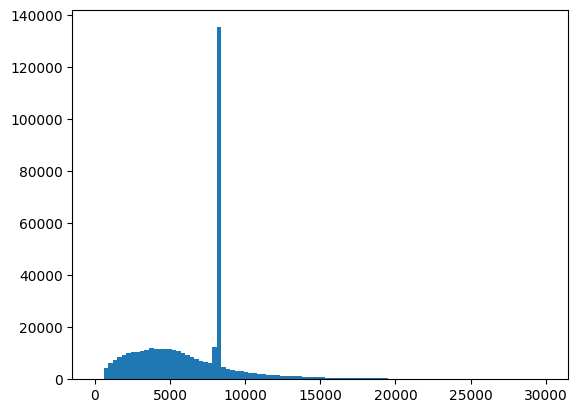

In [27]:
z=plt.hist(np.asarray(data.X.sum(1)),100,range=(0,30000))

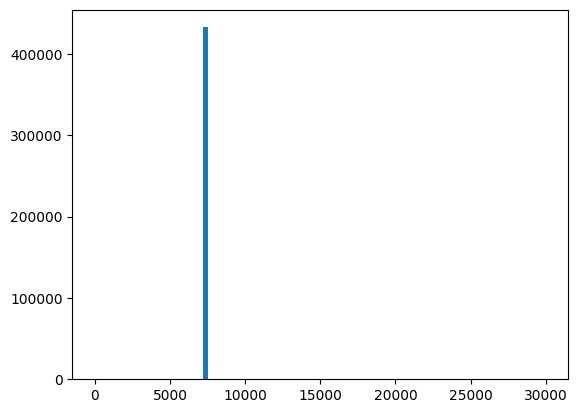

In [6]:
sc.pp.normalize_total(data,)
z=plt.hist(np.asarray(data.X.sum(1)),100,range=(0,30000))

In [29]:
data.write_h5ad(lustre_path+'/work/archr/combined_archr_gene_matrix_plus_ref.h5ad')